In [1]:
import shutil
import glob
import itertools as it
import pickle5 as pickle
import dask.dataframe as dd
import os
import pandas as pd
import openpyxl
from tqdm import tqdm
tqdm.pandas()


pd.set_option('display.max_columns', None)

In [ ]:
### function and helpers


def multiple_file_types(*patterns):
    return it.chain.from_iterable(glob.iglob(pattern) for pattern in patterns)


pattern = ['*C6H6_1g*.xlsx', '*NO2_1g*.xlsx', '*SO2_1g*.xlsx',
           '*O3_1g*.xlsx', '*PM10_1g*.xlsx', '*PM25_1g*.xlsx', '*CO_1g*.xlsx']

cd "./raw_data"

In [4]:
ls

 Volume in drive H is Nowy
 Volume Serial Number is 9285-320C

 Directory of H:\OneDrive - Warszawska Wyľsza Szko�a Informatyki\inzynierka\raw_data

16.01.2021  12:57    <DIR>          .
16.01.2021  12:57    <DIR>          ..
01.09.2016  14:41           760˙137 2000_NO2_1g.xlsx
01.09.2016  14:41            38˙779 2000_NO2_24g.xlsx
01.09.2016  14:41           811˙999 2000_NOx_1g.xlsx
01.09.2016  14:41           740˙057 2000_O3_1g.xlsx
01.09.2016  14:41            24˙207 2000_PM10_24g.xlsx
01.09.2016  14:41            31˙094 2000_SO2_24g.xlsx
01.09.2016  14:41            15˙315 2001_BaP(PM10)_24g.xlsx
01.09.2016  14:41            12˙182 2001_C6H6_24g.xlsx
01.09.2016  14:41            14˙433 2001_Cd(PM10)_24g.xlsx
01.09.2016  14:41            14˙977 2001_Ni(PM10)_24g.xlsx
01.09.2016  14:41           758˙537 2001_NO2_1g.xlsx
01.09.2016  14:41            35˙791 2001_NO2_24g.xlsx
01.09.2016  14:41           849˙842 2001_NOx_1g.xlsx
01.09.2016  14:41           720˙734 2001_O3_1g.xlsx
01.09.20

01.09.2016  14:44         3˙945˙334 2013_O3_1g.xlsx
01.09.2016  15:38            22˙168 2013_OC(PM2.5)_24g.xlsx
01.09.2016  14:44           138˙924 2013_Pb(PM10)_24g.xlsx
01.09.2016  14:44         4˙004˙148 2013_PM10_1g.xlsx
01.09.2016  14:44           300˙426 2013_PM10_24g.xlsx
01.09.2016  14:44         1˙224˙755 2013_PM2.5_1g.xlsx
01.09.2016  14:44           139˙942 2013_PM2.5_24g.xlsx
01.09.2016  14:44         6˙048˙924 2013_SO2_1g.xlsx
01.09.2016  14:44            21˙900 2013_SO2_24g.xlsx
01.09.2016  15:39            21˙203 2013_SO42_(PM2.5)_24g.xlsx
01.09.2016  14:44           154˙081 2014_As(PM10)_24g.xlsx
01.09.2016  14:44            50˙855 2014_BaA(PM10)_24g.xlsx
01.09.2016  14:44           227˙133 2014_BaP(PM10)_24g.xlsx
01.09.2016  14:44            49˙352 2014_BbF(PM10)_24g.xlsx
01.09.2016  14:44            49˙720 2014_BjF(PM10)_24g.xlsx
01.09.2016  14:44            49˙798 2014_BkF(PM10)_24g.xlsx
01.09.2016  14:44         3˙028˙348 2014_C6H6_1g.xlsx
01.09.2016  15:33         

In [21]:
def multiple_file_types(*patterns):
    return it.chain.from_iterable(glob.iglob(pattern) for pattern in patterns)


file_list = []
for file in multiple_file_types('*C6H6_1g*.xlsx', '*NO2_1g*.xlsx', '*SO2_1g*.xlsx', '*O3_1g*.xlsx', '*PM10_1g*.xlsx', '*PM25_1g*.xlsx', '*PM2.5_1g*.xlsx', '*CO_1g*.xlsx'):
    if "PM10" in file:
        os.makedirs("./filtered/PM10", exist_ok=True)
        shutil.copy(file, "./filtered/PM10")
    elif 'C6H6' in file:
        os.makedirs("./filtered/C6H6", exist_ok=True)
        shutil.copy(file, "./filtered/C6H6")
    elif "NO2" in file:
        os.makedirs("./filtered/NO2", exist_ok=True)
        shutil.copy(file, "./filtered/NO2")
    elif "SO2" in file:
        os.makedirs("./filtered/SO2", exist_ok=True)
        shutil.copy(file, "./filtered/SO2")
    elif "O3" in file:
        os.makedirs("./filtered/O3", exist_ok=True)
        shutil.copy(file, "./filtered/O3")
    elif "CO" in file:
        os.makedirs("./filtered/CO", exist_ok=True)
        shutil.copy(file, "./filtered/CO")
    elif "PM25" or "PM2.5" in file:
        os.makedirs("./filtered/PM25", exist_ok=True)
        shutil.copy(file, "./filtered/PM25")
    else:
        print("Byczku coś nie tak")

In [5]:
cd "filtered"

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data\filtered


In [6]:
cd "PM25"

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data\filtered\PM25


In [7]:
ls

 Volume in drive H is Nowy
 Volume Serial Number is 9285-320C

 Directory of H:\OneDrive - Warszawska Wyľsza Szko�a Informatyki\inzynierka\raw_data\filtered\PM25

16.01.2021  15:30    <DIR>          .
16.01.2021  15:30    <DIR>          ..
16.01.2021  13:24           135˙917 2006_PM2.5_1g.xlsx
16.01.2021  13:29           186˙154 2007_PM2.5_1g.xlsx
16.01.2021  13:25           479˙158 2008_PM2.5_1g.xlsx
16.01.2021  13:25           748˙786 2009_PM2.5_1g.xlsx
16.01.2021  13:25         1˙143˙946 2010_PM2.5_1g.xlsx
16.01.2021  13:25         1˙185˙017 2011_PM2.5_1g.xlsx
16.01.2021  13:25         1˙385˙419 2012_PM2.5_1g.xlsx
16.01.2021  13:25         1˙224˙755 2013_PM2.5_1g.xlsx
16.01.2021  13:25         2˙885˙330 2014_PM2.5_1g.xlsx
16.01.2021  13:25         3˙643˙336 2015_PM25_1g.xlsx
16.01.2021  15:26         2˙964˙264 2016_PM2.5_1g.xlsx
16.01.2021  15:26         3˙152˙571 2017_PM25_1g.xlsx
16.01.2021  15:30         3˙276˙831 2018_PM25_1g.xlsx
16.01.2021  15:30         4˙559˙057 2019_PM25_1g

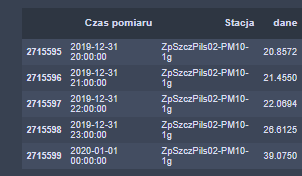

In [82]:
df.head()

,Kod stacji,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,LbLubObywate,LbNaleczow,LdLodzCzerni,LdLodzGdansk,LdZgieMielcz,LuNowaSolMOB,LuWsKaziWiel,LuZarySzyman,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpTarRoSitko,MzKonJezMos,MzLegZegrzyn,MzMinMazKaziMOB,MzOtwoBrzozo,MzPiasPulask,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarBajkowa,MzWarChrosci,MzWarKondrat,MzWarTolstoj,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,OpPrudPodgor,PdBialWaszyn,PdBorsukowiz,PdSuwPulaskp,PkDebiGrottg,PkHorZdrParkMOB,PkJarosPruch,PkMielBierna,PkPrzemGrunw,PkRymZdrPark,PkRzeszPilsu,PmGdaLeczk08,SkKielTargow,SkSkarZielnaMOB,SkStaraZlota,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
0,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
1,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
2,2019-01-01 01:00:00,33.40530,51.3878,118.773,102.0900,107.0610,64.1177,NaN,24.0030,51.317,56.0910,NaN,58.045,90.399,61.832,69.1061,53.2439,22.4823,43.76910,64.0752,98.7777,61.8134,55.8536,36.948323,46.795909,NaN,35.516948,NaN,34.271411,37.402349,61.20,64.121607,45.50000,58.7946,38.781605,NaN,42.034031,42.381466,60.7050,NaN,13,8.3,33.5,43.1,NaN,35.6,60.8821,47.6,19.3,34.7328,NaN,34.6,NaN,28.46838,110.1990,76.7306,26.3444,34.3706,14.9449,40.9183,75.2000,NaN,NaN,73.93500
3,2019-01-01 02:00:00,13.80280,28.4995,110.064,63.6111,55.9187,43.8401,NaN,33.6542,30.698,25.9812,NaN,32.032,64.149,41.882,17.3766,31.8878,12.9387,10.89580,69.0186,80.3041,57.0560,52.2659,30.390124,26.420152,27.65,27.257126,NaN,27.768130,18.935368,33.83,44.747658,32.60000,41.4439,25.475276,NaN,31.087669,25.506146,33.3039,NaN,126,7.6,5.7,44.8,NaN,23.1,29.8894,33,19.3,26.0467,NaN,79.2,NaN,19.88634,73.4132,54.4664,19.0619,23.1494,10.7420,25.9358,47.9076,NaN,NaN,11.78830
4,2019-01-01 03:00:00,9.94056,11.1206,107.941,48.3540,41.3488,22.8383,NaN,13.6030,28.262,18.9462,NaN,24.856,27.399,23.357,11.6721,18.3731,14.1175,9.41853,61.7894,49.2874,44.5697,48.9549,25.276952,26.544394,25.93,27.507424,26.01,26.310498,20.591028,27.28,32.867405,27.19931,25.0821,20.334194,NaN,23.715629,19.244234,26.5220,NaN,7,7.2,3.9,59.6,NaN,21.4,30.9634,23.6,21.6,25.3294,NaN,25,NaN,16.89493,50.2355,50.4599,43.7717,21.0711,12.0391,24.5725,22.8309,5.57095,NaN,8.69917


In [6]:
df = pd.read_excel('2019_PM25_1g.xlsx', header=0)
test = df.T
test.reset_index(inplace=True)
test.rename(columns=test.iloc[0], inplace=True)
test.drop(test.index[0], inplace=True)
test.reset_index(drop=True, inplace=True)
test = (test.set_index(["Kod stacji", "Wskaźnik", 'Czas uśredniania'])
        .rename_axis(['Czas pomiaru'], axis=1)
        .stack()
        .reset_index()
        .rename(columns={0: "dane"})
        )

In [7]:
test.head()

,Kod stacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane
0,DsDusznikMOB,PM2.5,1g,2019-01-01 01:00:00,33.4053
1,DsDusznikMOB,PM2.5,1g,2019-01-01 02:00:00,13.8028
2,DsDusznikMOB,PM2.5,1g,2019-01-01 03:00:00,9.94056
3,DsDusznikMOB,PM2.5,1g,2019-01-01 04:00:00,6.75889
4,DsDusznikMOB,PM2.5,1g,2019-01-01 05:00:00,7.88722


In [14]:
file_list

['2006_PM2.5_1g.xlsx',
 '2007_PM2.5_1g.xlsx',
 '2008_PM2.5_1g.xlsx',
 '2009_PM2.5_1g.xlsx',
 '2010_PM2.5_1g.xlsx',
 '2011_PM2.5_1g.xlsx',
 '2012_PM2.5_1g.xlsx',
 '2013_PM2.5_1g.xlsx',
 '2014_PM2.5_1g.xlsx',
 '2015_PM25_1g.xlsx',
 '2016_PM2.5_1g.xlsx',
 '2017_PM25_1g.xlsx',
 '2018_PM25_1g.xlsx',
 '2019_PM25_1g.xlsx']

In [34]:
cd "./raw_data"


H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data


In [35]:
cd "filtered"


H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data\filtered


In [36]:
cd "PM25"

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data\filtered\PM25


In [37]:
testowa_lista = ['2006_PM2.5_1g.xlsx', '2019_PM25_1g.xlsx']

In [38]:
file_list = []
for filename in multiple_file_types('*PM25_1g*.xlsx', '*PM2.5_1g*.xlsx'):
    file_list.append(filename)
file_list.sort()
# file_list

In [44]:
li = []
for file in tqdm(testowa_lista):
    df = pd.read_excel(file, header=0)
    test = df.T
    test.reset_index(inplace=True)
    test.rename(columns=test.iloc[0], inplace=True)
    test.drop(test.index[0], inplace=True)
    test.reset_index(drop=True, inplace=True)
    test = (test.set_index(["Kod stacji", "Wskaźnik", 'Czas uśredniania'])
            .rename_axis(['Czas pomiaru'], axis=1)
            .stack()
            .reset_index()
            .rename(columns={0: "dane", "Kod stacji": "KodStacji"})
            )
    li.append(test)
frame = pd.concat(li, axis=0, ignore_index=True)

100%|██████████| 2/2 [00:08<00:00,  4.40s/it]


In [45]:
frame.shape

(534368, 5)

In [46]:
frame.isnull().sum()

KodStacji           0
Wskaźnik            0
Czas uśredniania    0
Czas pomiaru        0
dane                0
dtype: int64

In [47]:
frame.dtypes

KodStacji                   object
Wskaźnik                    object
Czas uśredniania            object
Czas pomiaru        datetime64[ns]
dane                        object
dtype: object

In [48]:
frame.head()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane
0,ZpSzczecin002,PM2.5,1g,2006-03-14 01:00:00,32
1,ZpSzczecin002,PM2.5,1g,2006-03-14 02:00:00,31
2,ZpSzczecin002,PM2.5,1g,2006-03-14 03:00:00,31
3,ZpSzczecin002,PM2.5,1g,2006-03-14 04:00:00,30
4,ZpSzczecin002,PM2.5,1g,2006-03-14 05:00:00,30


In [49]:
cd ..

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data\filtered


In [50]:
cd ..

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka\raw_data


In [52]:
cd ..

H:\OneDrive - Warszawska Wyższa Szkoła Informatyki\inzynierka


In [63]:
metadane_STANOWISKA=pd.read_excel("./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx",sheet_name='STANOWISKA')
metadane_STACJE=pd.read_excel("./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx",sheet_name='STACJE')

In [64]:
beta.head()

,Kod stacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane
0,ZpSzczecin002,PM2.5,1g,2006-03-14 01:00:00,32
1,ZpSzczecin002,PM2.5,1g,2006-03-14 02:00:00,31
2,ZpSzczecin002,PM2.5,1g,2006-03-14 03:00:00,31
3,ZpSzczecin002,PM2.5,1g,2006-03-14 04:00:00,30
4,ZpSzczecin002,PM2.5,1g,2006-03-14 05:00:00,30


In [65]:
metadane_STANOWISKA.head()

,Nr,Kod stanowiska,Kod stacji,Nazwa stacji,Stary Kod stacji,Wskaźnik - kod,Wskaźnik,Czas uśredniania,Typ pomiaru,Data uruchomienia,Data zamknięcia,Województwo,Nazwa strefy
0,1,DsBialka-CO-1g,DsBialka,Białka,DsBialka,CO,tlenek węgla,1-godzinny,automatyczny,2004-01-01,2005-12-31,DOLNOŚLĄSKIE,strefa dolnośląska
1,2,DsBialka-PM10-1g,DsBialka,Białka,DsBialka,PM10,pył zawieszony PM10,1-godzinny,automatyczny,2004-01-01,2005-12-31,DOLNOŚLĄSKIE,strefa dolnośląska
2,3,DsBialka-SO2-1g,DsBialka,Białka,DsBialka,SO2,dwutlenek siarki,1-godzinny,automatyczny,2004-01-01,2005-12-31,DOLNOŚLĄSKIE,strefa dolnośląska
3,4,DsBialka-PM10-24g,DsBialka,Białka,DsBialka,PM10,pył zawieszony PM10,24-godzinny,manualny,2004-01-01,2005-12-31,DOLNOŚLĄSKIE,strefa dolnośląska
4,5,DsBialka-Pb(PM10)-24g,DsBialka,Białka,DsBialka,Pb(PM10),ołów w PM10,24-godzinny,manualny,1990-01-03,2005-12-31,DOLNOŚLĄSKIE,strefa dolnośląska


In [66]:
metadane_STACJE.head()

,Nr,Kod stacji,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji,Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Ulica,WGS84 φ N,WGS84 λ E
0,1,DsBialka,NaN,Białka,DsBialka,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
1,2,DsBielGrot,NaN,Bielawa - ul. Grota Roweckiego,DsBielGrot,1994-01-02,2003-12-31,tło,miejski,w budynku,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348
2,3,DsBogatFrancMOB,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,tło,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790
3,4,DsBogChop,PL0315A,Bogatynia - Chopina,DsBogChop,1996-01-01,2013-12-31,przemysłowa,miejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175
4,5,DsBogZatonieMob,PL0576A,Bogatynia - Mobil,DsBogZatonieMob,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327


In [136]:
alfa = pd.merge(frame, metadane_STACJE, left_on=['KodStacji'], right_on=['Kod stacji'],how='left',suffixes=('_x1', '_y1'))

In [137]:
alfa.head()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane,Nr,Kod stacji,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji,Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Ulica,WGS84 φ N,WGS84 λ E
0,ZpSzczecin002,PM2.5,1g,2006-03-14 01:00:00,32,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZpSzczecin002,PM2.5,1g,2006-03-14 02:00:00,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZpSzczecin002,PM2.5,1g,2006-03-14 03:00:00,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZpSzczecin002,PM2.5,1g,2006-03-14 04:00:00,30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ZpSzczecin002,PM2.5,1g,2006-03-14 05:00:00,30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
alfa.tail()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane,Nr,Kod stacji,Kod międzynarodowy,Nazwa stacji,Stary Kod stacji,Data uruchomienia,Data zamknięcia,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Ulica,WGS84 φ N,WGS84 λ E
534363,ZpSzczPils02,PM2.5,1g,2019-12-31 20:00:00,19.1689,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
534364,ZpSzczPils02,PM2.5,1g,2019-12-31 21:00:00,19.7136,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
534365,ZpSzczPils02,PM2.5,1g,2019-12-31 22:00:00,20.2439,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
534366,ZpSzczPils02,PM2.5,1g,2019-12-31 23:00:00,24.7417,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
534367,ZpSzczPils02,PM2.5,1g,2020-01-01 00:00:00,36.8575,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539


In [153]:
gamma = pd.merge(alfa, metadane_STACJE, left_on=['KodStacji'], right_on=['Stary Kod stacji'],how='left',suffixes=('_x2', '_y2'))

In [154]:
gamma.head()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane,Nr_x2,Kod stacji_x2,Kod międzynarodowy_x2,Nazwa stacji_x2,Stary Kod stacji_x2,Data uruchomienia_x2,Data zamknięcia_x2,Typ stacji_x2,Typ obszaru_x2,Rodzaj stacji_x2,Województwo_x2,Miejscowość_x2,Ulica_x2,WGS84 φ N_x2,WGS84 λ E_x2,Nr_y2,Kod stacji_y2,Kod międzynarodowy_y2,Nazwa stacji_y2,Stary Kod stacji_y2,Data uruchomienia_y2,Data zamknięcia_y2,Typ stacji_y2,Typ obszaru_y2,Rodzaj stacji_y2,Województwo_y2,Miejscowość_y2,Ulica_y2,WGS84 φ N_y2,WGS84 λ E_y2
0,ZpSzczecin002,PM2.5,1g,2006-03-14 01:00:00,32,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
1,ZpSzczecin002,PM2.5,1g,2006-03-14 02:00:00,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
2,ZpSzczecin002,PM2.5,1g,2006-03-14 03:00:00,31,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
3,ZpSzczecin002,PM2.5,1g,2006-03-14 04:00:00,30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539
4,ZpSzczecin002,PM2.5,1g,2006-03-14 05:00:00,30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539


In [155]:
gamma.tail()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane,Nr_x2,Kod stacji_x2,Kod międzynarodowy_x2,Nazwa stacji_x2,Stary Kod stacji_x2,Data uruchomienia_x2,Data zamknięcia_x2,Typ stacji_x2,Typ obszaru_x2,Rodzaj stacji_x2,Województwo_x2,Miejscowość_x2,Ulica_x2,WGS84 φ N_x2,WGS84 λ E_x2,Nr_y2,Kod stacji_y2,Kod międzynarodowy_y2,Nazwa stacji_y2,Stary Kod stacji_y2,Data uruchomienia_y2,Data zamknięcia_y2,Typ stacji_y2,Typ obszaru_y2,Rodzaj stacji_y2,Województwo_y2,Miejscowość_y2,Ulica_y2,WGS84 φ N_y2,WGS84 λ E_y2
534363,ZpSzczPils02,PM2.5,1g,2019-12-31 20:00:00,19.1689,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534364,ZpSzczPils02,PM2.5,1g,2019-12-31 21:00:00,19.7136,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534365,ZpSzczPils02,PM2.5,1g,2019-12-31 22:00:00,20.2439,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534366,ZpSzczPils02,PM2.5,1g,2019-12-31 23:00:00,24.7417,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534367,ZpSzczPils02,PM2.5,1g,2020-01-01 00:00:00,36.8575,1032.0,ZpSzczPils02,PL0249A,Szczecin_Piłsudskiego,ZpSzczecin002,2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.5539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
gamma.columns

Index(['KodStacji', 'Wskaźnik', 'Czas uśredniania', 'Czas pomiaru', 'dane',
       'Nr_x2', 'Kod stacji_x2', 'Kod międzynarodowy_x2', 'Nazwa stacji_x2',
       'Stary Kod stacji_x2', 'Data uruchomienia_x2', 'Data zamknięcia_x2',
       'Typ stacji_x2', 'Typ obszaru_x2', 'Rodzaj stacji_x2', 'Województwo_x2',
       'Miejscowość_x2', 'Ulica_x2', 'WGS84 φ N_x2', 'WGS84 λ E_x2', 'Nr_y2',
       'Kod stacji_y2', 'Kod międzynarodowy_y2', 'Nazwa stacji_y2',
       'Stary Kod stacji_y2', 'Data uruchomienia_y2', 'Data zamknięcia_y2',
       'Typ stacji_y2', 'Typ obszaru_y2', 'Rodzaj stacji_y2', 'Województwo_y2',
       'Miejscowość_y2', 'Ulica_y2', 'WGS84 φ N_y2', 'WGS84 λ E_y2'],
      dtype='object')

In [13]:
# Wyszukanie plików w folderze i załadowanie ich do listy
file_list = []
for filename in multiple_file_types('./raw_data/filtered/SO2/*.xlsx'):
    file_list.append(filename)
file_list.sort()

try:
    # Zmiana wyglądu ramki danych
    li = []
    for file in tqdm(file_list):
        df = pd.read_excel(file, header=0)
        test = df.T
        test.reset_index(inplace=True)
        test.rename(columns=test.iloc[0], inplace=True)
        test.drop(test.index[0], inplace=True)
        test.reset_index(drop=True, inplace=True)
        test = (test.set_index(["Kod stacji", "Wskaźnik", 'Czas uśredniania'])
                .rename_axis(['Czas pomiaru'], axis=1)
                .stack()
                .reset_index()
                .rename(columns={0: "dane", "Kod stacji": "KodStacji"})
                )
        li.append(test)
except Exception as e:
    print(e)
    raise
frame = pd.concat(li, axis=0, ignore_index=True)
# Łączenie ramki danych ze słownikami w celu ujednolicenia danych Stary Kod stacji zamienić na nowy etc.
gamma = pd.merge(frame, metadane_STACJE, left_on=['KodStacji'], right_on=[
                 'Kod stacji'], how='left', suffixes=('_x1', '_y1'))
gamma = pd.merge(gamma, metadane_STACJE, left_on=['KodStacji'], right_on=[
                 'Stary Kod stacji'], how='left', suffixes=('_x2', '_y2'))
gamma = gamma[['KodStacji', 'Wskaźnik', 'Czas uśredniania',
               'Czas pomiaru', 'dane', 'Kod stacji_x2', 'Kod stacji_y2']]
gamma['Kod stacji_x2'].fillna(gamma['Kod stacji_y2'], inplace=True)
gamma.drop(columns=["Kod stacji_y2"], inplace=True)
gamma.rename(columns={"Kod stacji_x2": "Kod stacji_metadane"}, inplace=True)
#gamma=pd.merge(gamma, metadane_STACJE, left_on=['Kod stacji_metadane'], right_on=['Kod stacji'],how='left')
gamma['KodStanowiska'] = gamma['Kod stacji_metadane'] + \
    "-"+gamma['Wskaźnik']+"-"+gamma['Czas uśredniania']
#gamma=pd.merge(gamma, metadane_STANOWISKA, left_on=['KodStanowiska'], right_on=['Kod stanowiska'],how='left')
gamma[['KodStacji', 'Wskaźnik', 'Czas uśredniania', 'Kod stacji_metadane', 'KodStanowiska']] = gamma[[
    'KodStacji', 'Wskaźnik', 'Czas uśredniania', 'Kod stacji_metadane', 'KodStanowiska']].astype("category")
gamma['dane'] = gamma['dane'].astype(str).apply(lambda x: x.replace(',', '.'))
gamma['dane'] = gamma['dane'].astype('float32')
pkl_file = './data/SO2.pkl'
# saving df into pickle
gamma.to_pickle(pkl_file)


100%|██████████| 19/19 [05:05<00:00, 16.08s/it]


In [7]:
files = glob.glob('./data/*.pkl')
df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)
df.to_pickle("./data/MergedPickle.pkl")

In [2]:
df = pd.read_pickle('./data/pm10.pkl')
#ddf = dd.from_pandas(df, npartitions=8)

In [3]:
df.head()

,KodStacji,Wskaźnik,Czas uśredniania,Czas pomiaru,dane,Kod stacji_metadane,KodStanowiska
0,DsBogChop,PM10,1g,2003-01-01 01:00:00,90.0,DsBogChop,DsBogChop-PM10-1g
1,DsBogChop,PM10,1g,2003-01-01 02:00:00,61.0,DsBogChop,DsBogChop-PM10-1g
2,DsBogChop,PM10,1g,2003-01-01 03:00:00,75.0,DsBogChop,DsBogChop-PM10-1g
3,DsBogChop,PM10,1g,2003-01-01 04:00:00,76.0,DsBogChop,DsBogChop-PM10-1g
4,DsBogChop,PM10,1g,2003-01-01 05:00:00,79.0,DsBogChop,DsBogChop-PM10-1g


In [18]:
df = pd.read_pickle("./data/MergedPickle.pkl")
metadane_STANOWISKA = pd.read_excel(
    "./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx", sheet_name='STANOWISKA')
metadane_STACJE = pd.read_excel(
    "./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx", sheet_name='STACJE')
df = pd.merge(df, metadane_STACJE, left_on=[
              'Kod stacji_metadane'], right_on=['Kod stacji'], how='left')
df = pd.merge(df, metadane_STANOWISKA, left_on=[
              'KodStanowiska'], right_on=['Kod stanowiska'], how='left')

MemoryError: 

In [ ]:
df = pd.read_pickle("./data/MergedPickle.pkl")  # read from pickle with pandas
ddf = dd.from_pandas(df, npartitions=10)  # split with dask.dataframe
# metadane_STANOWISKA=pd.read_excel("./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx",sheet_name='STANOWISKA')
# metadane_STACJE=pd.read_excel("./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx",sheet_name='STACJE')
# df=pd.merge(df, metadane_STACJE, left_on=['Kod stacji_metadane'], right_on=['Kod stacji'],how='left')

In [19]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

metadane_STANOWISKA = pd.read_excel(
    "./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx", sheet_name='STANOWISKA')
metadane_STACJE = pd.read_excel(
    "./dictionaries/Metadane - stacje i stanowiska pomiarowe.xlsx", sheet_name='STACJE')

df = pd.read_pickle("./data/MergedPickle.pkl")  # read from pickle with pandas
ddf = dd.from_pandas(df, npartitions=10)

df2 = ddf.merge(metadane_STACJE, left_on=[
                'Kod stacji_metadane'], right_on=['Kod stacji'], how='left')


pbar = ProgressBar()
pbar.register()

AttributeError: 'HhԀ' object has no attribute 'seek'